# Homework Data Visualization

- Nama: Althaaf Athaayaa Daffa Qushayyizidane
- Data Science Batch 34

In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# please import as much as you need

In [2]:
# read your data

df_ori = pd.read_csv('Telco-Customer-Churn.csv')
df_ori.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [25]:
df_group = df_ori.groupby('PaymentMethod')[('MonthlyCharges')].sum().reset_index()
df_group

,PaymentMethod,MonthlyCharges
0,Bank transfer (automatic),103745.45
1,Credit card (automatic),101231.85
2,Electronic check,180345.00
3,Mailed check,70794.30


<Axes: xlabel='PaymentMethod'>

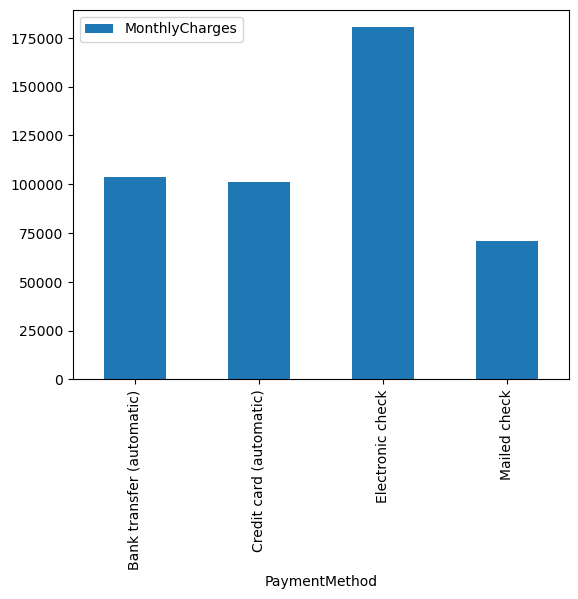

In [26]:
df_group.plot(x="PaymentMethod", y="MonthlyCharges", kind="bar")

# Normal

## Dalam rata-rata, payment method mana yang memiliki monthly charge terbesar per customernya?

Hint: Gunakan groupby payment method terhadap monthly charge dengan aggregate function rata-rata

In [27]:
# your code goes here!
df_group1 = df_ori.groupby('PaymentMethod')[('MonthlyCharges')].mean().reset_index()
df_group1

,PaymentMethod,MonthlyCharges
0,Bank transfer (automatic),67.192649
1,Credit card (automatic),66.512385
2,Electronic check,76.255814
3,Mailed check,43.917060


<Axes: xlabel='PaymentMethod'>

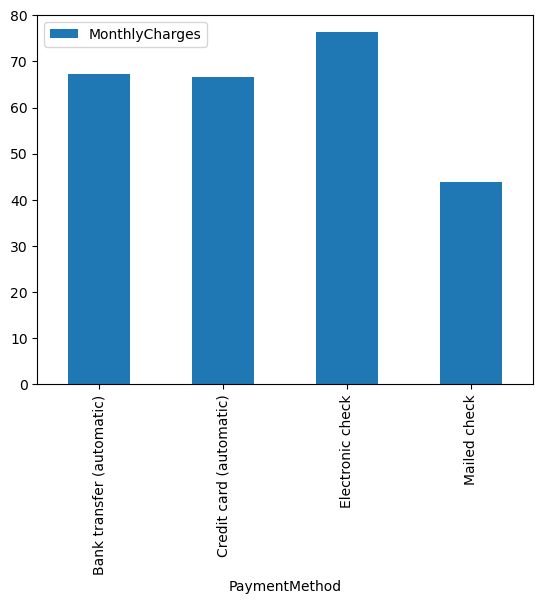

In [28]:
df_group1.plot(x="PaymentMethod", y="MonthlyCharges", kind="bar")

**Jadi, dari plot di atas, dapat disimpulkan bahwa payment method yang memiliki monthly charge terbesar per customernya adalah Electronic check**

## Bagaimana jumlah customer dilihat dari tenure group?

Tenure group:
- low_tenure: User dengan tenure < 21 bulan
- medium_tenure: User dengan tenure 21 - 40 bulan
- high_tenure: User dengan tenure > 40 bulan

Hint:
- Memotong data integer menjadi group categorical dapat menggunakan beberapa macam cara, contohnya dengan numpy.where atau pandas.cut
- Mirip dengan plot pertama, namun ini menghitung jumlah unique users

In [44]:
# your code goes here!
df_ori['tenure_group'] = np.where(df_ori.tenure > 40, 'high_tenure',
                                  np.where(df_ori.tenure >= 21, 'medium_tenure', 'low_tenure'))

In [45]:
df_ori.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,low_tenure
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,medium_tenure
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,low_tenure
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,high_tenure
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,low_tenure


In [53]:
df_ori.tenure_group.value_counts()

low_tenure       2878
high_tenure      2757
medium_tenure    1408
Name: tenure_group, dtype: int64

<Axes: xlabel='tenure_group', ylabel='Count'>

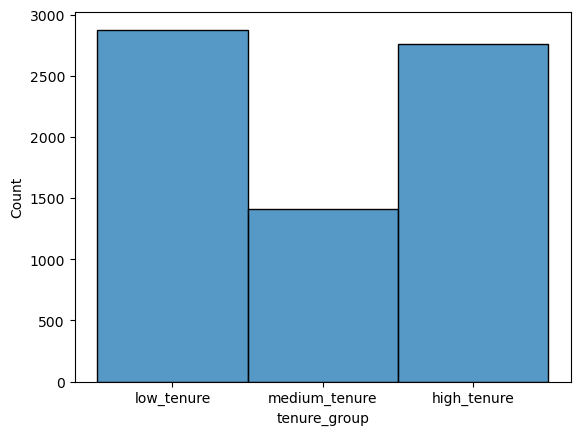

In [56]:
sns.histplot(x="tenure_group", data=df_ori)

**Jadi, dari plot di atas, kami menyimpulkan bahwa user dengan group low tenure lebih banyak dibanding dengan medium dan high tenure**

## Apakah kebanyakan dari Senior Citizen berlangganan PhoneService?

Hint:
- Dapat menggunakan feature/input parameter hue pada seaborn
- Dalam menghitung jumlah unique customer, jangan lupa perhatikan angka rasio, tidak hanya angka absolutnya



In [57]:
df_ori.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,low_tenure
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,medium_tenure
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,low_tenure
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,high_tenure
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,low_tenure


In [65]:
# your code goes here!
df_senior = df_ori.groupby('PhoneService').agg({'SeniorCitizen' : 'sum',
                                                'customerID' : 'nunique'}).reset_index()
df_senior

,PhoneService,SeniorCitizen,customerID
0,No,104,682
1,Yes,1038,6361


In [84]:
df_senior['percentage'] = df_senior['customerID'] / df_senior['customerID'].sum() * 100
round(df_senior,2)

,PhoneService,SeniorCitizen,customerID,percentage
0,No,104,682,9.68
1,Yes,1038,6361,90.32


<Axes: xlabel='PhoneService', ylabel='SeniorCitizen'>

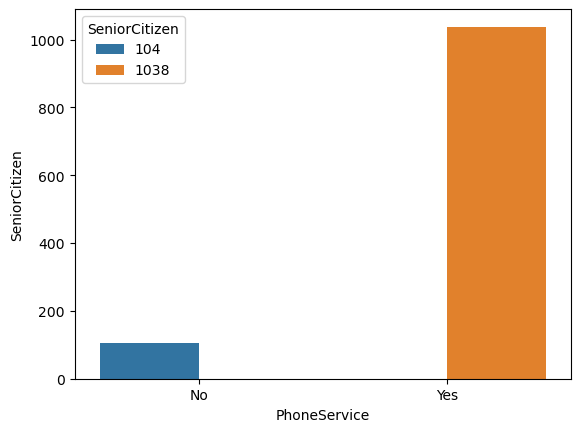

In [85]:
sns.barplot(x="PhoneService", y="SeniorCitizen", data=df_senior, estimator=sum, hue="SeniorCitizen")

**Jadi, dari plot di atas, dapat disimpulkan bahwa warga senior banyak yang menggunakan layanan 
telepon**

## Bagaimana Distribusi dari TotalCharge?

Hint:
- Ubah datatype TotalCharge dari object ke int atau float
- Buat distribusi plot!

In [88]:
# your code goes here!
df_ori.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,low_tenure
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,medium_tenure
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,low_tenure
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,high_tenure
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,low_tenure


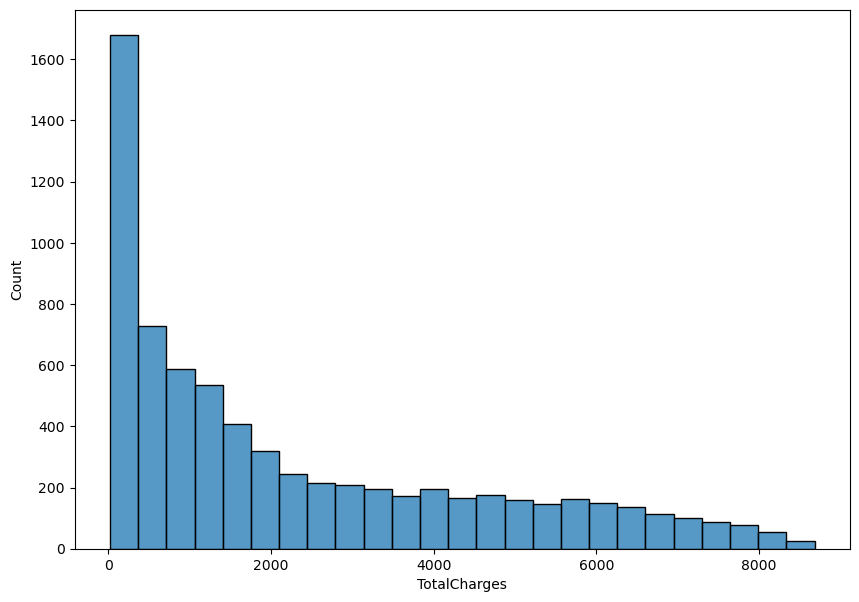

In [91]:
df_ori = df_ori.copy()

df_ori['TotalCharges'] = pd.to_numeric(df_ori['TotalCharges'], errors = 'coerce')
df_ori.dropna(subset=['TotalCharges'], inplace = True)

plt.figure(figsize = (10,7))
sns.histplot(df_ori['TotalCharges'],label='total')
plt.show()


**Jadi, dari plot di atas, dapat disimpulkan bahwa distribusi dari total biaya adalah positively skewed yang berarti ekor distribusi berada di sebelah kanan nilai terbanyak. Berarti, sebagian besar distribusi berada di nilai rendah.**

# Intermediate

## Apakah customer yang memiliki monthly charges yang tinggi cenderung churn?

Hint: dapat ditunjukan melalui distribusi data

In [92]:
# your code goes here!
df_ori.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,low_tenure
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,medium_tenure
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,low_tenure
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,high_tenure
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,low_tenure


In [117]:
df_ori['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

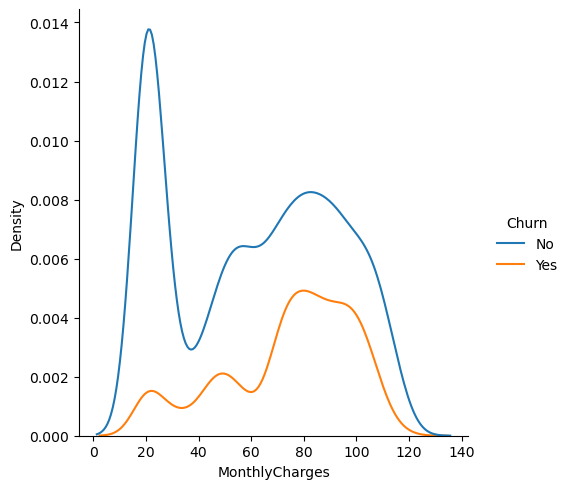

In [116]:
sns.displot(data=df_ori, x='MonthlyCharges', hue='Churn', kind='kde')

**Jadi, dari plot di atas, dapat disimpulkan bahwa customer yang memiliki monthly charges yang tinggi cenderung churn**

## Bagaimana pengaruh memiliki partner & dependents terhadap tingkat churn customer?

Hint: concat partner dan dependents, gunakan parameter 'hue' pada seaborn untuk mempermudah

In [128]:
# your code goes here!
df_ori.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,low_tenure
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,medium_tenure
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,low_tenure
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,high_tenure
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,low_tenure


In [9]:
df_ori['partner_dependents'] = df_ori['Partner'] + '-' + df_ori['Dependents']
df_ori['partner_dependents'].value_counts()

No-No      3280
Yes-Yes    1749
Yes-No     1653
No-Yes      361
Name: partner_dependents, dtype: int64

In [10]:
df_pardep = df_ori.groupby(['partner_dependents','Churn'])['customerID'].nunique().reset_index()
df_pardep.columns = ['partner_dependents', 'Churn', 'customer_unique']
#df_pardep2 = df_ori.groupby('partner_dependents')['customerID'].nunique().reset_index(name = 'all_unique_customer')

#df_mrg = df_pardep.merge(df_pardep2, how = 'inner', on = 'partner_dependents')

#df_mrg
df_pardep

,partner_dependents,Churn,customer_unique
0,No-No,No,2157
1,No-No,Yes,1123
2,No-Yes,No,284
3,No-Yes,Yes,77
4,Yes-No,No,1233
5,Yes-No,Yes,420
6,Yes-Yes,No,1500
7,Yes-Yes,Yes,249


In [151]:
df_pardep['percentage'] = df_pardep['customer_unique'] / df_pardep['customer_unique'].sum() * 100
round(df_pardep,2)

,partner_dependents,Churn,customer_unique,percentage
0,No-No,No,2157,30.67
1,No-No,Yes,1123,15.97
2,No-Yes,No,282,4.01
3,No-Yes,Yes,77,1.09
4,Yes-No,No,1233,17.53
5,Yes-No,Yes,420,5.97
6,Yes-Yes,No,1491,21.20
7,Yes-Yes,Yes,249,3.54


In [157]:
df_pardep.value_counts()

partner_dependents  Churn  customer_unique  percentage
No-No               No     2157             30.674061     1
                    Yes    1123             15.969852     1
No-Yes              No     282              4.010239      1
                    Yes    77               1.094994      1
Yes-No              No     1233             17.534130     1
                    Yes    420              5.972696      1
Yes-Yes             No     1491             21.203072     1
                    Yes    249              3.540956      1
dtype: int64

<Axes: xlabel='Churn', ylabel='customer_unique'>

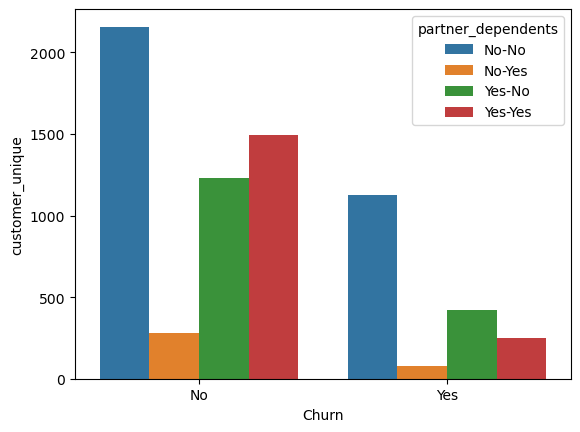

In [156]:
sns.barplot(x="Churn", y="customer_unique", data=df_pardep, estimator=sum, hue="partner_dependents")

**Jadi, dari plot di atas, dapat disimpulkan bahwa pengaruh memiliki pasangan & tanggungan 
terhadap tingkat churn pelanggan sebesar 3.54%**

# Soal Hard

## Buatlah satu insight dari data telco customer, dan sertakan storyline pada visualisasi tersebut! dengan hanya memanfaatkan atribut PaymentMethod, CustomerID, dan Churn!

In [27]:
df_ori.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [73]:
# Using np.where to create a new 'status' column
df_ori['status'] = np.where((df_ori['SeniorCitizen'] == 1) | (df_ori['Partner'] == 'Yes') | (df_ori['Dependents'] == 'Yes'), 'Married', 'Single')

# Display the first five rows of the dataframe
df_ori.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,status
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Married
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,Single
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Single
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Single
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Single


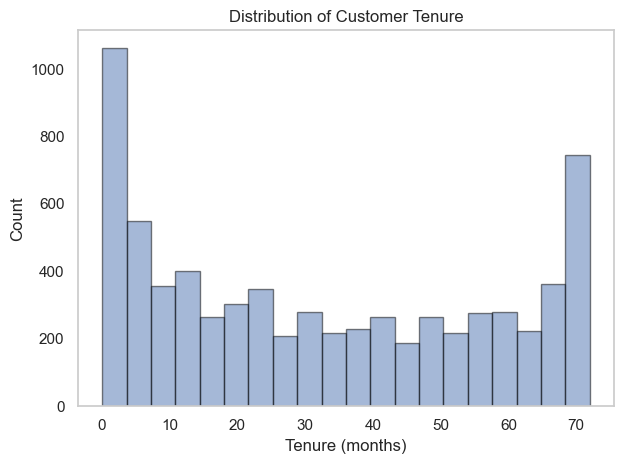

In [14]:
plt.hist(df_ori['tenure'], bins=20, alpha=0.5, edgecolor='black')
plt.xlabel('Tenure (months)') 
plt.ylabel('Count') 
plt.title('Distribution of Customer Tenure')
plt.grid()
plt.tight_layout() 
plt.savefig('histogram.png')
plt.show()

**Storyline:** Dari histogram ini, kita dapat melihat bahwa ada dua kelompok pelanggan yang dominan: yang baru berlangganan kurang dari 10 bulan dan yang sudah berlangganan lebih dari 60 bulan. Ini menunjukkan bahwa ada pelanggan yang loyal dan pelanggan yang mudah beralih.

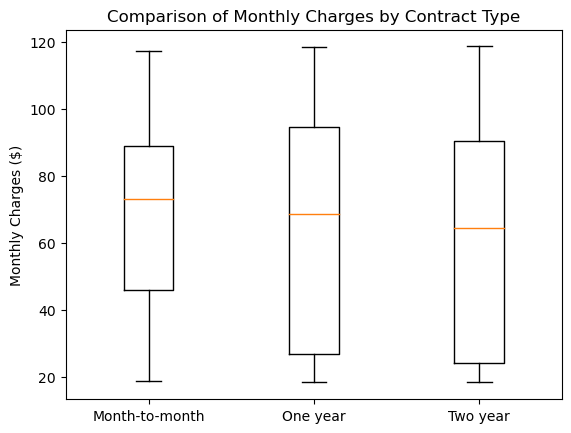

In [58]:
# Membuat boxplot untuk menunjukkan perbandingan monthly charges (biaya bulanan) pelanggan berdasarkan contract (jenis kontrak)
plt.boxplot([df_ori[df_ori['Contract'] == 'Month-to-month']['MonthlyCharges'],
             df_ori[df_ori['Contract'] == 'One year']['MonthlyCharges'],
             df_ori[df_ori['Contract'] == 'Two year']['MonthlyCharges']])
plt.xticks([1, 2, 3], ['Month-to-month', 'One year', 'Two year'])
plt.ylabel('Monthly Charges ($)')
plt.title('Comparison of Monthly Charges by Contract Type')
plt.show()


**Storyline:** Dari boxplot ini, kita dapat melihat bahwa pelanggan yang memiliki kontrak bulanan cenderung membayar biaya bulanan yang lebih tinggi daripada pelanggan yang memiliki kontrak satu tahun atau dua tahun. Ini mungkin karena kontrak bulanan memberikan fleksibilitas lebih bagi pelanggan untuk mengubah layanan atau beralih ke penyedia lain.

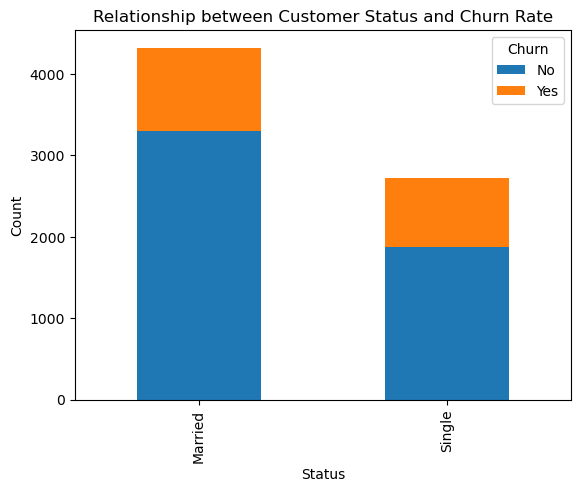

In [55]:
# Membuat bar chart untuk menunjukkan hubungan antara status (status perkawinan) pelanggan dan churn (tingkat keluar)
status_churn = df_ori.groupby(['status', 'Churn']).size().unstack()
status_churn.plot(kind='bar', stacked=True)
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Relationship between Customer Status and Churn Rate')
plt.legend(['No', 'Yes'], title='Churn')
plt.show()


**Storyline:** Dari bar chart ini, kita dapat melihat bahwa pelanggan yang berstatus Single cenderung memiliki tingkat churn yang lebih tinggi daripada pelanggan yang berstatus Married. Ini mungkin karena pelanggan yang berstatus Single lebih mudah terpengaruh oleh faktor-faktor eksternal seperti promosi, diskon, atau rekomendasi dari teman.

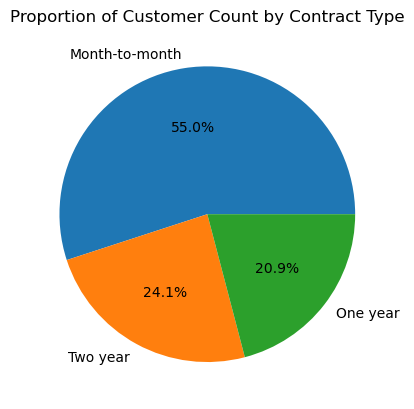

In [56]:
# Membuat pie chart untuk menunjukkan proporsi jumlah pelanggan berdasarkan contract (jenis kontrak)
contract_count = df_ori['Contract'].value_counts()
plt.pie(contract_count, labels=contract_count.index, autopct='%1.1f%%')
plt.title('Proportion of Customer Count by Contract Type')
plt.show()


**Storyline:** Dari pie chart ini, kita dapat melihat bahwa sebagian besar pelanggan (55.0%) memiliki kontrak bulanan, sedangkan sisanya memiliki kontrak satu tahun (20.9%) atau dua tahun (24.1%). Ini menunjukkan bahwa perusahaan harus meningkatkan strategi retensi pelanggan untuk mengurangi churn rate pada kontrak bulanan.

<Figure size 800x600 with 0 Axes>

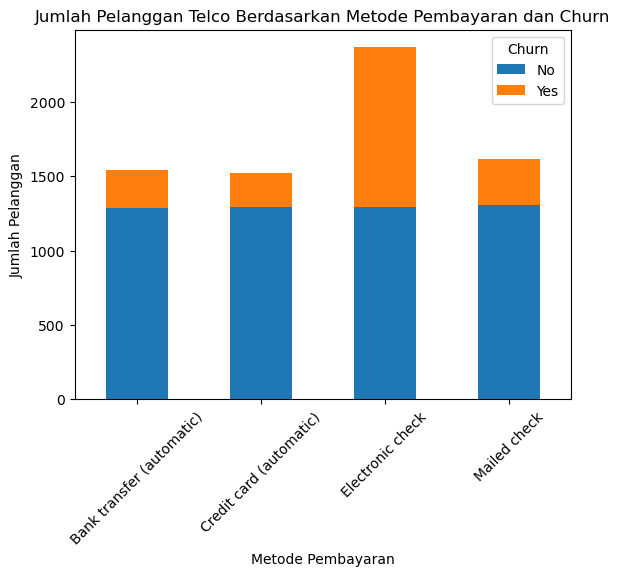

In [10]:
plt.figure(figsize=(8,6))
payment_churn = df_ori.groupby(['PaymentMethod', 'Churn'])['customerID'].count().unstack().reset_index()
payment_churn.columns = ['PaymentMethod', 'No', 'Yes']
payment_churn.plot.bar(x='PaymentMethod', y=['No', 'Yes'], stacked=True)
plt.xlabel('Metode Pembayaran')
plt.ylabel('Jumlah Pelanggan')
plt.title('Jumlah Pelanggan Telco Berdasarkan Metode Pembayaran dan Churn')
plt.legend(title='Churn')
plt.xticks(rotation=45)
plt.show()

**Storyline:** Visualisasi ini menunjukkan bahwa pelanggan yang menggunakan metode pembayaran Electronic check memiliki jumlah churn tertinggi (1071 pelanggan), diikuti oleh pelanggan yang menggunakan metode pembayaran Mailed check (308 pelanggan), Bank transfer (automatic) (258 pelanggan), dan Credit card (automatic) (232 pelanggan). Ini menunjukkan bahwa telco ini perlu memberikan insentif atau kemudahan bagi pelanggan yang menggunakan metode pembayaran otomatis, misalnya dengan memberikan diskon atau cashback.

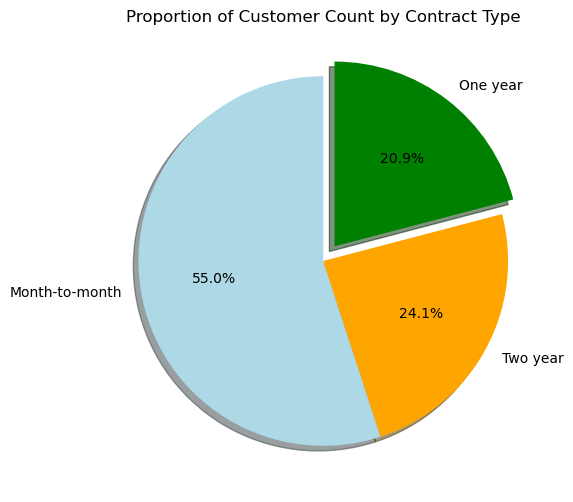

In [8]:
# Membuat pie chart untuk menunjukkan proporsi jumlah pelanggan berdasarkan contract (jenis kontrak)
contract_count = df_ori['Contract'].value_counts()
# Menentukan explode, shadow, startangle, dan colors
explode = (0, 0, 0.1) # Memisahkan potongan dengan proporsi terkecil
shadow = True # Memberikan efek bayangan
startangle = 90 # Memutar pie chart 90 derajat
colors = ('lightblue', 'orange', 'green') # Mengubah warna potongan
# Membuat pie chart dengan parameter tambahan
plt.figure(figsize=(8, 6)) # Mengatur ukuran gambar
plt.pie(contract_count, labels=contract_count.index, autopct='%1.1f%%', explode=explode, shadow=shadow, startangle=startangle, colors=colors)
plt.title('Proportion of Customer Count by Contract Type')
plt.show()


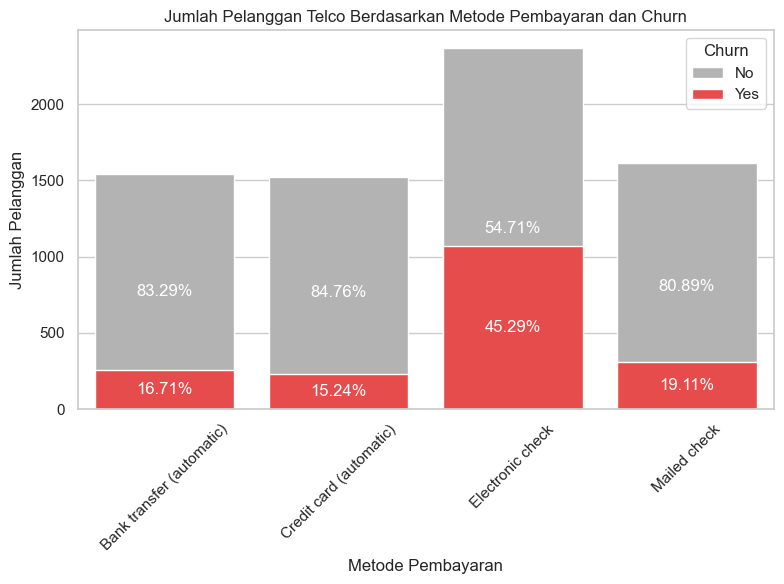

In [9]:
# Membuat dataframe baru dengan agregasi jumlah pelanggan berdasarkan metode pembayaran dan churn
payment_churn = df_ori.groupby(['PaymentMethod', 'Churn'])['customerID'].count().unstack().reset_index()
payment_churn.columns = ['PaymentMethod', 'No', 'Yes']

# Membuat kolom baru dengan total jumlah pelanggan untuk setiap metode pembayaran
payment_churn['Total'] = payment_churn['No'] + payment_churn['Yes']

# Membuat kolom baru dengan persentase pelanggan yang churn dan tidak untuk setiap metode pembayaran
payment_churn['No (%)'] = payment_churn['No'] / payment_churn['Total'] * 100
payment_churn['Yes (%)'] = payment_churn['Yes'] / payment_churn['Total'] * 100

# Mengatur ukuran gambar
plt.figure(figsize=(8,6))

# Menggunakan seaborn untuk membuat grafik batang bertumpuk dengan palet warna yang lebih kontras dan informatif
sns.set_theme(style='whitegrid')
sns.barplot(data=payment_churn, x='PaymentMethod', y='Total', color='#b3b3b3', label='No')
sns.barplot(data=payment_churn, x='PaymentMethod', y='Yes', color='#ff3333', label='Yes')

# Menambahkan label persentase pada setiap batang dengan fungsi loop
for i, p in enumerate(plt.gca().patches):
    # Mendapatkan koordinat x dan y dari setiap batang
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height() / 2
    
    # Mendapatkan nilai persentase dari dataframe dengan indeks yang sesuai
    if i < 4:
        percent = payment_churn['No (%)'][i]
    else:
        percent = payment_churn['Yes (%)'][i-4]
    
    # Memformat nilai persentase menjadi dua angka desimal
    percent = '{:.2f}%'.format(percent)
    
    # Menambahkan label persentase pada posisi yang sesuai dengan warna putih dan ukuran font 12
    plt.text(x, y, percent, color='white', ha='center', va='center', size=12)

# Menambahkan label sumbu x dan y serta judul grafik
plt.xlabel('Metode Pembayaran')
plt.ylabel('Jumlah Pelanggan')
plt.title('Jumlah Pelanggan Telco Berdasarkan Metode Pembayaran dan Churn')

# Menambahkan legenda dengan judul Churn
plt.legend(title='Churn')

# Mengatur rotasi label sumbu x agar lebih mudah dibaca
plt.xticks(rotation=45)

# Mengatur margin dan padding agar grafik tidak terpotong atau terlalu rapat
plt.tight_layout()

# Menyimpan grafik sebagai file gambar dengan resolusi tinggi (300 dpi)
plt.savefig('payment_churn.png', dpi=300)

# Menampilkan grafik di layar
plt.show()

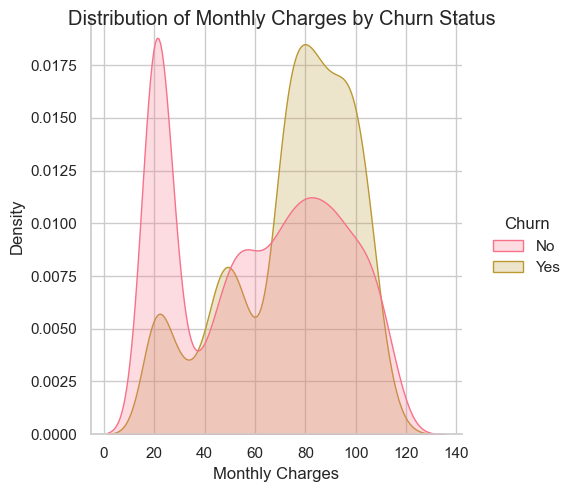

In [15]:
# Set the style and color palette
sns.set(style="whitegrid")
sns.set_palette("husl")

# Create the displot with additional parameters
g = sns.displot(data=df_ori, x='MonthlyCharges', hue='Churn', kind='kde', fill=True, common_norm=False)

# Add a title and labels
g.fig.suptitle('Distribution of Monthly Charges by Churn Status')
plt.xlabel('Monthly Charges')
plt.ylabel('Density')

# Show the plot
plt.show()

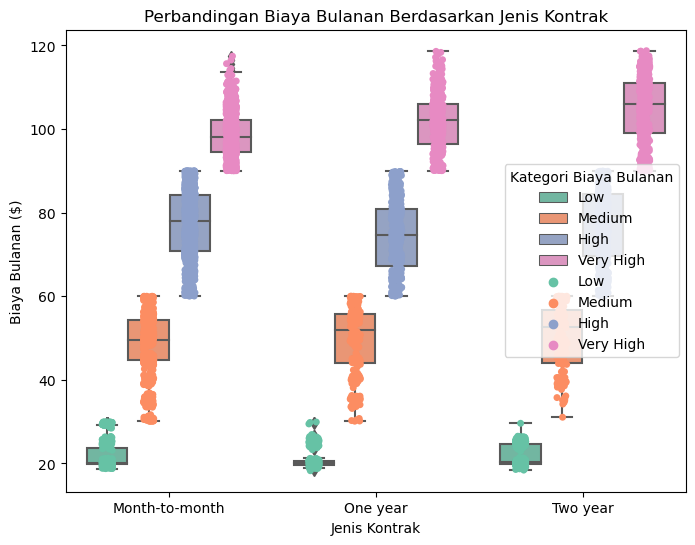

In [4]:
# Membuat kolom baru di dataframe yang berisi kategori biaya bulanan
# Anda bisa mengubah rentang nilai sesuai dengan kebutuhan Anda
bins = [0, 30, 60, 90, 120]
labels = ['Low', 'Medium', 'High', 'Very High']
df_ori['MonthlyChargesCategory'] = pd.cut(df_ori['MonthlyCharges'], bins=bins, labels=labels)

# Membuat grafik kotak dengan seaborn
plt.figure(figsize=(8,6))
sns.boxplot(x='Contract', y='MonthlyCharges', hue='MonthlyChargesCategory', data=df_ori, palette='Set2')
plt.xlabel('Jenis Kontrak')
plt.ylabel('Biaya Bulanan ($)')
plt.title('Perbandingan Biaya Bulanan Berdasarkan Jenis Kontrak')

# Menambahkan strip plot pada grafik
sns.stripplot(x='Contract', y='MonthlyCharges', hue='MonthlyChargesCategory', data=df_ori, palette='Set2', jitter=0.1, dodge=True)
plt.legend(title='Kategori Biaya Bulanan')

# Menampilkan grafik
plt.show()

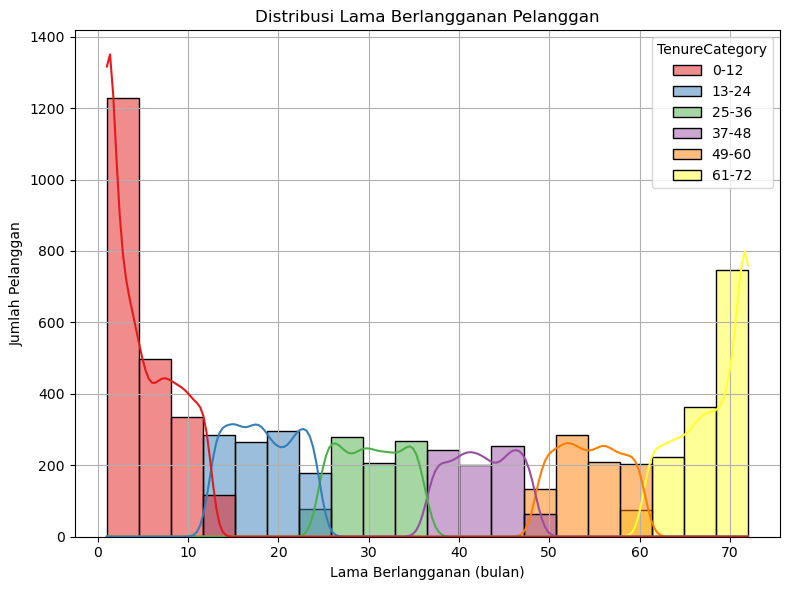

In [5]:
# Membuat kolom baru di dataframe yang berisi kategori lama berlangganan
# Anda bisa mengubah rentang nilai sesuai dengan kebutuhan Anda
bins = [0, 12, 24, 36, 48, 60, 72]
labels = ['0-12', '13-24', '25-36', '37-48', '49-60', '61-72']
df_ori['TenureCategory'] = pd.cut(df_ori['tenure'], bins=bins, labels=labels)

# Membuat histogram dengan seaborn
plt.figure(figsize=(8,6))
sns.histplot(x='tenure', hue='TenureCategory', data=df_ori, bins=20, alpha=0.5, edgecolor='black', palette='Set1', kde=True)
plt.xlabel('Lama Berlangganan (bulan)')
plt.ylabel('Jumlah Pelanggan')
plt.title('Distribusi Lama Berlangganan Pelanggan')
plt.grid()
plt.tight_layout()
plt.savefig('histogram.png')

# Menampilkan grafik
plt.show()

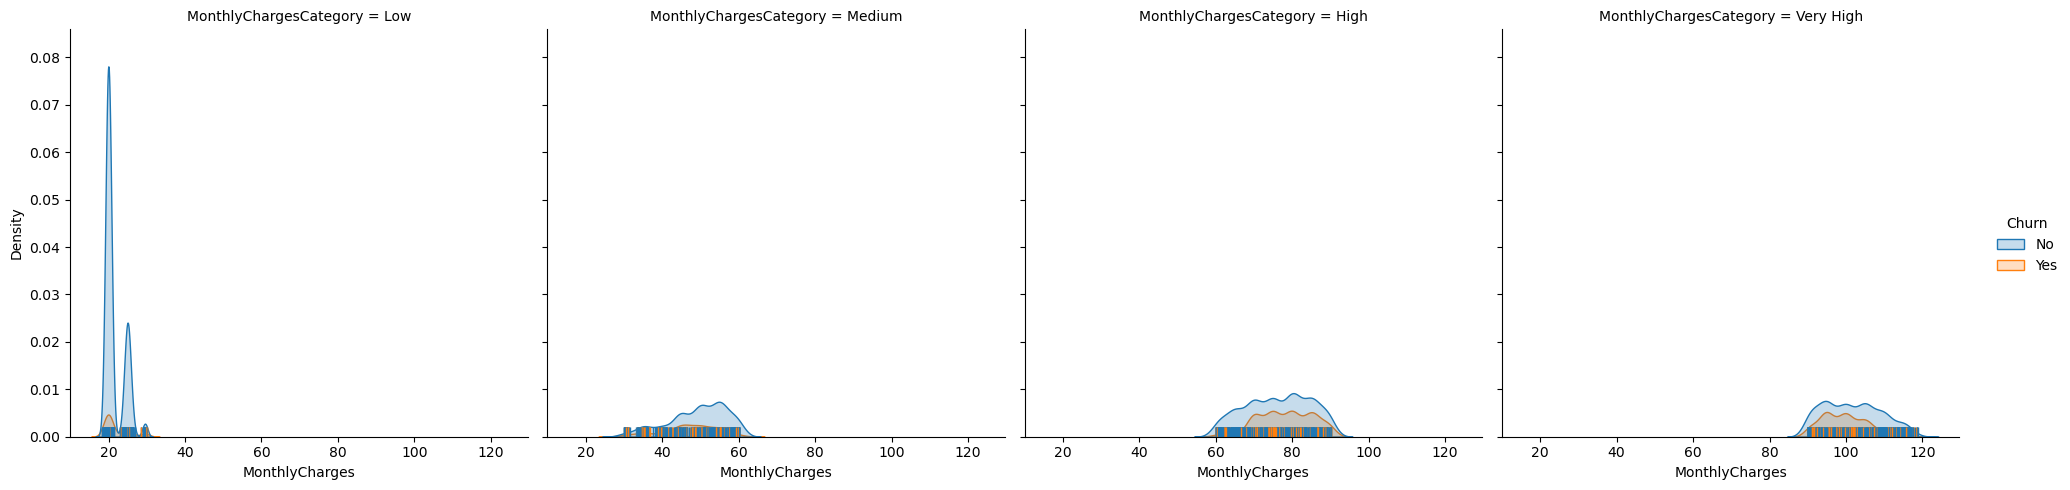

In [6]:
# Membuat kolom baru di dataframe yang berisi kategori biaya bulanan
# Anda bisa mengubah rentang nilai sesuai dengan kebutuhan Anda
bins = [0, 30, 60, 90, 120]
labels = ['Low', 'Medium', 'High', 'Very High']
df_ori['MonthlyChargesCategory'] = pd.cut(df_ori['MonthlyCharges'], bins=bins, labels=labels)

# Membuat kde plot dengan seaborn
sns.displot(data=df_ori, x='MonthlyCharges', hue='Churn', col='MonthlyChargesCategory', kind='kde', fill=True, rug=True)

C:\Users\altha\AppData\Local\Temp\ipykernel_6788\3092680403.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Churn", y="customer_unique_proportion", data=df_pardep, estimator=sum, hue="partner_dependents", ci=None)


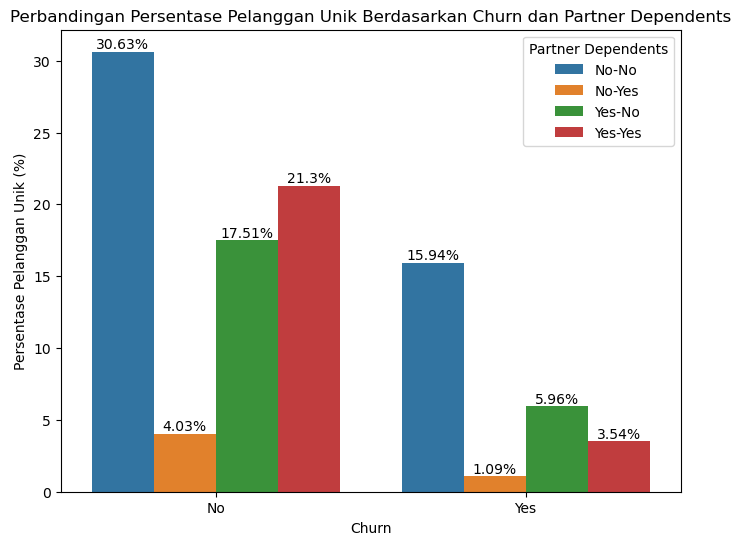

In [11]:
# Membuat kolom baru di dataframe yang berisi proporsi pelanggan unik berdasarkan churn dan partner_dependents
df_pardep['customer_unique_proportion'] = df_pardep['customer_unique'] / df_pardep['customer_unique'].sum() * 100

# Membuat grafik batang dengan seaborn
plt.figure(figsize=(8,6))
sns.barplot(x="Churn", y="customer_unique_proportion", data=df_pardep, estimator=sum, hue="partner_dependents", ci=None)
plt.xlabel('Churn')
plt.ylabel('Persentase Pelanggan Unik (%)')
plt.title('Perbandingan Persentase Pelanggan Unik Berdasarkan Churn dan Partner Dependents')
plt.legend(title='Partner Dependents')

# Menambahkan anotasi teks pada grafik
for p in plt.gca().patches:
    # Mendapatkan nilai persentase dari setiap batang
    value = round(p.get_height(), 2)
    # Mendapatkan posisi x dan y dari setiap batang
    x = p.get_x() + p.get_width() / 2 # Menempatkan teks di tengah batang
    y = p.get_y() + p.get_height() # Menempatkan teks di atas batang
    # Menampilkan teks dengan format persentase
    plt.text(x, y, f'{value}%', ha='center', va='bottom')

# Menampilkan grafik
plt.show()